In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("Classification_train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train = df.sample(frac=0.8, random_state=42)
x_test = df.drop(x_train.index)
y_train = x_train.pop("label").values
y_test = x_test.pop("label").values

In [5]:
one_hot_y = pd.get_dummies(y_train)
one_hot_y = one_hot_y.replace({True: 1, False: 0})

In [6]:
one_hot_y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [7]:
def initialise(x, num_classes):
    m, n = x.shape
    w = np.random.rand(n,num_classes)
    b = np.zeros(num_classes)
    return w, b    

In [8]:
def softmax(x, w, b):
    if isinstance(b, pd.Series):
        b = b.to_numpy()
    z = np.dot(x, w) + b.reshape(1, -1)
    s = np.exp(z - np.max(z, axis = 1, keepdims = True))
    s /= np.sum(s, axis = 1, keepdims = True) 
    return s

In [9]:
def cost(x, w, b, y):
    y = y.to_numpy()
    epsilon = 10e-8
    m = x.shape[0]
    s = softmax(x , w , b)
    cost = -np.sum(y * np.log(s + epsilon))/m
    return cost

In [10]:
def derivatives(x, y, w, b):
    m, n = x.shape
    s = softmax(x, w, b)
    err = s - y
    dj_dw = np.dot(x.T, err)/m
    dj_db = np.sum(err, axis=0)/m
    return dj_dw, dj_db

In [11]:
def update(x, y, w, b, aplha):
    dj_dw , dj_db = derivatives(x, y, w, b)
    w = w - aplha*dj_dw
    b = b - alpha*dj_db
    return w, b

In [12]:
num = len(np.unique(y_train))
w, b = initialise(x_train, num)
num_iters = 200
j_his= []
for i in range(num_iters):
    alpha = .03*((.9)**(i/5))
    w, b = update(x_train, one_hot_y, w, b, alpha)
    j = cost(x_train, w, b, one_hot_y)
    if (i%10 == 0):
        print(f"iteration {i}: cost {j}")
    j_his.append(j)
    

iteration 0: cost 7.65242165757943
iteration 10: cost 1.4775386880226518
iteration 20: cost 1.1933267730213237
iteration 30: cost 1.0477167510220156
iteration 40: cost 0.9744868903910231
iteration 50: cost 0.9191443321625639
iteration 60: cost 0.8815779725515187
iteration 70: cost 0.8626867579223056
iteration 80: cost 0.8410890704755503
iteration 90: cost 0.8243305322721604
iteration 100: cost 0.8058907828903714
iteration 110: cost 0.7959848906379708
iteration 120: cost 0.7895360488355079
iteration 130: cost 0.7810413893429503
iteration 140: cost 0.7715677396128332
iteration 150: cost 0.765321697647238
iteration 160: cost 0.7618207377465172
iteration 170: cost 0.7590567346243396
iteration 180: cost 0.7573051006253662
iteration 190: cost 0.7558560424551253


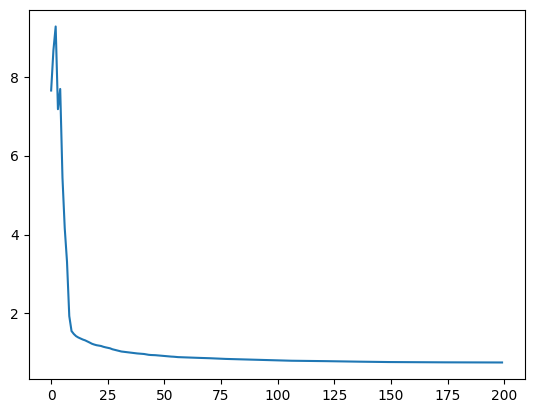

In [13]:
plt.plot(np.arange(num_iters), j_his)

In [14]:
s = softmax(x_train, w, b)
y_hat = np.argmax(s, axis = 1)
sum = np.sum(y_train == y_hat)

In [15]:
print(f"accuracy on trainging set: {sum/len(y_train)}")

accuracy on trainging set: 0.9512916666666666


In [16]:
s_test = softmax(x_test, w, b)
y_hat_test = np.argmax(s_test, axis = 1)
sum_test = np.sum(y_test == y_hat_test)

In [17]:
print(f"accuracy on training set: {sum_test/len(y_test)}")

accuracy on training set: 0.9423333333333334
